## (복습) 2월과 3월 아파트 평균 가격의 차이가 있는가?(차이검정)

In [1]:
!pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/35/2e/8ca90e7edc93bc3d3bdf6daa6d5fc5ae4882994171c3db765365227e1d58/pingouin-0.5.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.9 kB ? eta -:--:--
   -- ------------------------------------- 10.2/198.9 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/198.9 kB 217.9 kB/s eta 0:00:01
   ---- ---------------------------------- 20.5/198.9 kB 217.9 kB/s eta 0:00:01
   -------- ------------------------------ 41.0/198.9 kB 245.8 kB/s eta 0:00:01
   ---------------- ---------------------- 81.9/198.9 kB 383.3 kB/s eta 0:00:01
   ---------------- ---------------------- 81.9/198.9 kB 383.3 kB/s eta 0:00:01
   ------------------ -------------------

In [2]:
from pingouin import ttest
import pandas as pd

seoul = pd.read_csv("seoul_real_estate.csv", parse_dates=['DEAL_YMD'])
seoul['month'] = seoul['DEAL_YMD'].dt.month
apt_df = seoul[(seoul['HOUSE_TYPE'] == '아파트') & (seoul['month'].isin([2, 3]))]

dec_df = apt_df[apt_df['month'] == 2]
nov_df = apt_df[apt_df['month'] == 3]

print('2월 아파트 평균 가격(만원) : ', dec_df['OBJ_AMT'].mean())
print('3월 아파트 평균 가격(만원) : ', nov_df['OBJ_AMT'].mean())
ttest(dec_df['OBJ_AMT'], nov_df['OBJ_AMT'], paired=False)

2월 아파트 평균 가격(만원) :  107010.86292962357
3월 아파트 평균 가격(만원) :  93951.16883116883


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.155249,2792.413094,two-sided,2.709830e-07,"[8092.4, 18026.99]",0.166668,2.167e+04,0.995301


**p-val : 5.915944x10-9, p-val 값이 0.05보다 작은 값으로 2월과 3월의 평균 가격은 같지 않다.**

## (복습 2) 2월과 3월 아파트 평균 가격의 차이가 있는가? (차이 검정) - 시각화

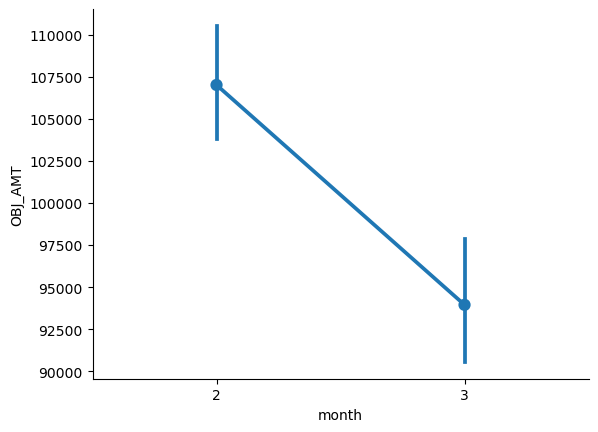

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.pointplot(x = 'month', y = 'OBJ_AMT', data = apt_df)
sns.despine()
plt.savefig('stat01.png', dpi=200)
plt.show()

**오차 막대는 95% 신뢰구간을 나타냄**